In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tqdm import tqdm
import pickle
#import time 

import tensorflow as tf

import keras


In [4]:
training_data =[]
src_path= "D:/datasets/Train"
subclass=os.listdir(src_path)
def create_training_data():
    new_size=(224,224)
    for sclass in subclass:
        path=os.path.join(src_path,sclass)
        class_num=subclass.index(sclass)
        for img in tqdm(os.listdir(path)):
            if img.endswith('.jpeg'):
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(img_array, new_size)


            training_data.append([resized_img,class_num])
            


In [5]:
create_training_data()
print(len(training_data))
training_data

100%|███████████████████████████████████████████████████████████████████████████████| 322/322 [00:01<00:00, 226.68it/s]


1599


[[array([[254, 254, 254, ..., 205, 208, 210],
         [254, 254, 254, ..., 205, 207, 209],
         [254, 254, 254, ..., 204, 205, 207],
         ...,
         [170, 167, 149, ..., 161, 156, 157],
         [174, 165, 141, ..., 162, 154, 156],
         [176, 163, 135, ..., 164, 153, 155]], dtype=uint8),
  0],
 [array([[210, 208, 205, ..., 254, 254, 254],
         [209, 207, 205, ..., 254, 254, 254],
         [207, 205, 204, ..., 254, 254, 254],
         ...,
         [157, 156, 161, ..., 149, 167, 170],
         [155, 154, 162, ..., 141, 164, 174],
         [155, 153, 164, ..., 135, 163, 176]], dtype=uint8),
  0],
 [array([[254, 254, 254, ..., 254, 253, 253],
         [254, 254, 254, ..., 254, 253, 253],
         [254, 254, 254, ..., 254, 253, 253],
         ...,
         [170, 169, 161, ..., 133, 136, 146],
         [174, 168, 157, ..., 136, 144, 148],
         [176, 167, 153, ..., 141, 150, 149]], dtype=uint8),
  0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [6]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,224,224,1)
print(X[0])

[[[254]
  [254]
  [254]
  ...
  [205]
  [208]
  [210]]

 [[254]
  [254]
  [254]
  ...
  [205]
  [207]
  [209]]

 [[254]
  [254]
  [254]
  ...
  [204]
  [205]
  [207]]

 ...

 [[170]
  [167]
  [149]
  ...
  [161]
  [156]
  [157]]

 [[174]
  [165]
  [141]
  ...
  [162]
  [154]
  [156]]

 [[176]
  [163]
  [135]
  ...
  [164]
  [153]
  [155]]]


In [7]:
import pickle 
pickle_out = open("X_Augumented_Grayscale","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_Augumented_Grayscale","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [8]:
import tensorflow as tf

import keras

pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0
NAME="Model_2"


# Model building


In [9]:
model=Sequential()

model.add(Conv2D(100,(5,5),padding="same",strides=(2,2),activation="relu", input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(250,(5,5),padding="same",strides=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
history = model.fit(X,y,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
1279/1279 [==============================] - 55s 43ms/step - loss: 1.4176 - accuracy: 0.3096 - val_loss: 10.4968 - val_accuracy: 0.0000e+00
Epoch 2/10
1279/1279 [==============================] - 55s 43ms/step - loss: 1.2433 - accuracy: 0.4027 - val_loss: 12.1967 - val_accuracy: 0.0000e+00
Epoch 3/10
1279/1279 [==============================] - 56s 44ms/step - loss: 1.0690 - accuracy: 0.5106 - val_loss: 12.0718 - val_accuracy: 0.0000e+00
Epoch 4/10
1279/1279 [==============================] - 56s 44ms/step - loss: 1.0010 - accuracy: 0.5629 - val_loss: 15.1737 - val_accuracy: 0.0000e+00
Epoch 5/10
1279/1279 [==============================] - 55s 43ms/step - loss: 0.8506 - accuracy: 0.6239 - val_loss: 16.2941 - val_accuracy: 0.0000e+00
Epoch 6/10
1279/1279 [==============================] - 58s 45ms/step - loss: 0.7716 - accuracy: 0.6787 - val_loss: 15.6230 - val_accuracy: 0.0000e+00
Epoch 7/10
1279/1279 [==============================] - 58s 45ms/step - loss: 0.6973 - accurac

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 100)     2600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 100)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 100)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 250)       625250    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 250)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 250)         0

In [13]:
model.save("D:/datasets/mod./CNN_model")

INFO:tensorflow:Assets written to: D:/datasets/mod./CNN_model\assets


INFO:tensorflow:Assets written to: D:/datasets/mod./CNN_model\assets


In [14]:
model.save("D:/datasets/mod./CNN_h5_model.h5")

In [15]:
model = keras.models.load_model("D:/datasets/mod./CNN_h5_model.h5")

In [16]:
from tensorflow.keras.preprocessing import image

def prediction(img):
    img = image.img_to_array(img)
    img = img.reshape(-1, 224, 224, 1)
    img = img.astype('float32')
    img = img/255.0
    
    return np.argmax(model.predict(img),axis=-1)[0]

In [17]:
labels=["jute","maize", "rice", "sugarcane","wheat"]

In [18]:
path = "D:/datasets/Train/sugarcane/sugarcane028arot.jpeg"
img = image.load_img(path,target_size=(224,224),color_mode="grayscale")

# Prediction


Input image:


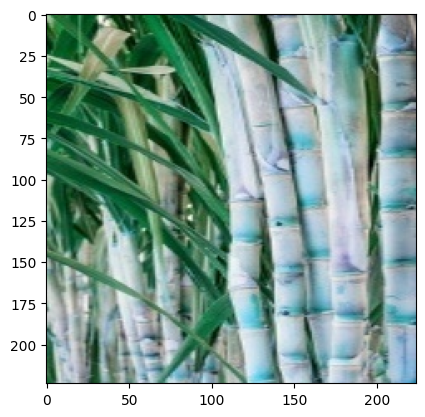

In [19]:
print("Input image:")

img_path=cv2.imread(path)
plt.imshow(img_path, cmap='gray')
plt.show()

Actual Matched image:
1/1 [==============================] - 0s 91ms/step


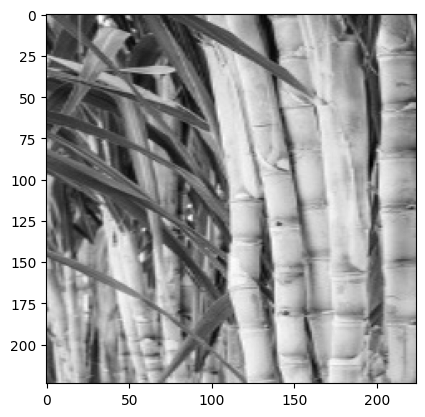

1/1 [==============================] - 0s 30ms/step
sugarcane


In [20]:
print("Actual Matched image:")

res_path=cv2.imread("D:/datasets/"+labels[prediction(img)]+".jpeg")
#res_path = res_path.astype(float)/255.0
res_path = np.float32(img) / 255
plt.imshow(res_path, cmap='gray')
plt.show()

print(labels[prediction(img)])